In [1]:
! python3 --version

Python 3.8.12


In [2]:
import pandas as pd
import numpy as np
import os
import re
import functools

pd.__version__, np.__version__

('1.4.1', '1.21.2')

In [3]:
project_dir = '/Users/gurdeep/Documents/tb2/DSMP/G32-Butterfly-Data'
module_dir = project_dir+'/modules'

dataset_filepath = '/Users/gurdeep/Documents/tb2/DSMP/air_quality_data_bristol_council_continuous.csv'

os.chdir(project_dir)
current_working_dir = os.getcwd()
print("Current working dir:", current_working_dir)
print("All paths correct:", os.path.isdir(project_dir) == os.path.isdir(module_dir) == os.path.isfile(dataset_filepath) == True)

Current working dir: /Users/gurdeep/Documents/tb2/DSMP/G32-Butterfly-Data
All paths correct: True


In [4]:
# importing preprocessing module
os.chdir(module_dir)
import Preprocessing
os.chdir(current_working_dir)

## Loading File

In [5]:
df = pd.read_csv(dataset_filepath, delimiter=";")

df.info()
df.head()

/var/folders/cp/544pr8ln1f3cn9n_wy4r5nz80000gn/T/ipykernel_73672/2401789151.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_filepath, delimiter=";")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474958 entries, 0 to 1474957
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Date Time        1474951 non-null  object 
 1   NOx              1341397 non-null  float64
 2   NO2              1338612 non-null  float64
 3   NO               1347733 non-null  float64
 4   SiteID           1474958 non-null  int64  
 5   PM10             327509 non-null   float64
 6   NVPM10           88165 non-null    float64
 7   VPM10            88158 non-null    float64
 8   NVPM2.5          71978 non-null    float64
 9   PM2.5            122492 non-null   float64
 10  VPM2.5           71978 non-null    float64
 11  CO               195930 non-null   float64
 12  O3               250210 non-null   float64
 13  SO2              156179 non-null   float64
 14  Temperature      82089 non-null    float64
 15  RH               19304 non-null    float64
 16  Air Pressure     0

,Date Time,NOx,NO2,NO,SiteID,PM10,NVPM10,VPM10,NVPM2.5,PM2.5,...,SO2,Temperature,RH,Air Pressure,Location,geo_point_2d,DateStart,DateEnd,Current,Instrument Type
0,2014-08-22T08:00:00+00:00,37.74893,23.65380,9.19260,452,8.7,6.8,1.9,NaN,NaN,...,NaN,NaN,NaN,NaN,AURN St Pauls,"51.4628294172,-2.58454081635",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
1,2014-08-22T06:00:00+00:00,249.50000,26.75000,145.00000,206,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Rupert Street,"51.4554331987,-2.59626237324",2003-01-01T00:00:00+00:00,2015-12-31T00:00:00+00:00,False,Continuous (Reference)
2,2014-08-22T06:00:00+00:00,42.19836,31.83834,6.75662,452,7.5,6.7,0.8,NaN,NaN,...,NaN,NaN,NaN,NaN,AURN St Pauls,"51.4628294172,-2.58454081635",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
3,2014-08-22T04:00:00+00:00,27.25000,18.75000,5.50000,215,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parson Street School,"51.432675707,-2.60495665673",2002-02-01T00:00:00+00:00,NaN,True,Continuous (Reference)
4,2014-08-22T01:00:00+00:00,36.50000,24.75000,7.75000,270,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Wells Road,"51.4278638883,-2.56374153315",2003-05-23T00:00:00+00:00,NaN,True,Continuous (Reference)


## Renaming columns

In [6]:
{col: '' for col in df.columns}

{'Date Time': '',
 'NOx': '',
 'NO2': '',
 'NO': '',
 'SiteID': '',
 'PM10': '',
 'NVPM10': '',
 'VPM10': '',
 'NVPM2.5': '',
 'PM2.5': '',
 'VPM2.5': '',
 'CO': '',
 'O3': '',
 'SO2': '',
 'Temperature': '',
 'RH': '',
 'Air Pressure': '',
 'Location': '',
 'geo_point_2d': '',
 'DateStart': '',
 'DateEnd': '',
 'Current': '',
 'Instrument Type': ''}

In [7]:
mapper = {'Date Time': 'datetime',
 'NOx': 'nox',
 'NO2': 'no2',
 'NO': 'no',
 'SiteID': 'site_id',
 'PM10': 'pm10',
 'NVPM10': 'nvpm10',
 'VPM10': 'vpm10',
 'NVPM2.5': 'nvpm25',
 'PM2.5': 'pm25',
 'VPM2.5': 'vpm25',
 'CO': 'co',
 'O3': 'o3',
 'SO2': 'so2',
 'Temperature': 'tempt',
 'RH': 'relative_humidity',
 'Air Pressure': 'air_pressure',
 'Location': 'location',
 'geo_point_2d': 'geo_point_2d',
 'DateStart': 'site_start_date',
 'DateEnd': 'site_end_date',
 'Current': 'is_active',
 'Instrument Type': 'instrument_type'}

In [8]:
df.rename(columns=mapper, inplace=True)

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474958 entries, 0 to 1474957
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   datetime           1474951 non-null  object 
 1   nox                1341397 non-null  float64
 2   no2                1338612 non-null  float64
 3   no                 1347733 non-null  float64
 4   site_id            1474958 non-null  int64  
 5   pm10               327509 non-null   float64
 6   nvpm10             88165 non-null    float64
 7   vpm10              88158 non-null    float64
 8   nvpm25             71978 non-null    float64
 9   pm25               122492 non-null   float64
 10  vpm25              71978 non-null    float64
 11  co                 195930 non-null   float64
 12  o3                 250210 non-null   float64
 13  so2                156179 non-null   float64
 14  tempt              82089 non-null    float64
 15  relative_humidity  19304 non-nul

,datetime,nox,no2,no,site_id,pm10,nvpm10,vpm10,nvpm25,pm25,...,so2,tempt,relative_humidity,air_pressure,location,geo_point_2d,site_start_date,site_end_date,is_active,instrument_type
0,2014-08-22T08:00:00+00:00,37.74893,23.65380,9.19260,452,8.7,6.8,1.9,NaN,NaN,...,NaN,NaN,NaN,NaN,AURN St Pauls,"51.4628294172,-2.58454081635",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
1,2014-08-22T06:00:00+00:00,249.50000,26.75000,145.00000,206,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Rupert Street,"51.4554331987,-2.59626237324",2003-01-01T00:00:00+00:00,2015-12-31T00:00:00+00:00,False,Continuous (Reference)
2,2014-08-22T06:00:00+00:00,42.19836,31.83834,6.75662,452,7.5,6.7,0.8,NaN,NaN,...,NaN,NaN,NaN,NaN,AURN St Pauls,"51.4628294172,-2.58454081635",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
3,2014-08-22T04:00:00+00:00,27.25000,18.75000,5.50000,215,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parson Street School,"51.432675707,-2.60495665673",2002-02-01T00:00:00+00:00,NaN,True,Continuous (Reference)
4,2014-08-22T01:00:00+00:00,36.50000,24.75000,7.75000,270,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Wells Road,"51.4278638883,-2.56374153315",2003-05-23T00:00:00+00:00,NaN,True,Continuous (Reference)


## Spliting geo_point_2d  column

In [10]:
df['latitude'] = df['geo_point_2d'].apply(lambda s: s.split(",")[0])
df['longitude'] = df['geo_point_2d'].apply(lambda s: s.split(",")[1])

df.drop(columns=['geo_point_2d'], inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474958 entries, 0 to 1474957
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   datetime           1474951 non-null  object 
 1   nox                1341397 non-null  float64
 2   no2                1338612 non-null  float64
 3   no                 1347733 non-null  float64
 4   site_id            1474958 non-null  int64  
 5   pm10               327509 non-null   float64
 6   nvpm10             88165 non-null    float64
 7   vpm10              88158 non-null    float64
 8   nvpm25             71978 non-null    float64
 9   pm25               122492 non-null   float64
 10  vpm25              71978 non-null    float64
 11  co                 195930 non-null   float64
 12  o3                 250210 non-null   float64
 13  so2                156179 non-null   float64
 14  tempt              82089 non-null    float64
 15  relative_humidity  19304 non-nul

,datetime,nox,no2,no,site_id,pm10,nvpm10,vpm10,nvpm25,pm25,...,tempt,relative_humidity,air_pressure,location,site_start_date,site_end_date,is_active,instrument_type,latitude,longitude
0,2014-08-22T08:00:00+00:00,37.74893,23.65380,9.19260,452,8.7,6.8,1.9,NaN,NaN,...,NaN,NaN,NaN,AURN St Pauls,2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference),51.4628294172,-2.58454081635
1,2014-08-22T06:00:00+00:00,249.50000,26.75000,145.00000,206,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Rupert Street,2003-01-01T00:00:00+00:00,2015-12-31T00:00:00+00:00,False,Continuous (Reference),51.4554331987,-2.59626237324
2,2014-08-22T06:00:00+00:00,42.19836,31.83834,6.75662,452,7.5,6.7,0.8,NaN,NaN,...,NaN,NaN,NaN,AURN St Pauls,2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference),51.4628294172,-2.58454081635
3,2014-08-22T04:00:00+00:00,27.25000,18.75000,5.50000,215,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Parson Street School,2002-02-01T00:00:00+00:00,NaN,True,Continuous (Reference),51.432675707,-2.60495665673
4,2014-08-22T01:00:00+00:00,36.50000,24.75000,7.75000,270,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Wells Road,2003-05-23T00:00:00+00:00,NaN,True,Continuous (Reference),51.4278638883,-2.56374153315


## Datetime check

In [11]:
Preprocessing.DateTimeAnalyzer(df).printDateInfo()

Total Object dtype columns: 4
Total Date Columns: 3
Date columns list: ['datetime', 'site_start_date', 'site_end_date']
Total Non Date Columns: 4


In [12]:
df = Preprocessing.DateTimeAnalyzer(df).convertedDataframe().sort_values(by='datetime').reset_index(drop=True)

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474958 entries, 0 to 1474957
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   datetime           1474951 non-null  datetime64[ns, UTC]
 1   nox                1341397 non-null  float64            
 2   no2                1338612 non-null  float64            
 3   no                 1347733 non-null  float64            
 4   site_id            1474958 non-null  int64              
 5   pm10               327509 non-null   float64            
 6   nvpm10             88165 non-null    float64            
 7   vpm10              88158 non-null    float64            
 8   nvpm25             71978 non-null    float64            
 9   pm25               122492 non-null   float64            
 10  vpm25              71978 non-null    float64            
 11  co                 195930 non-null   float64            
 12  o3            

,datetime,nox,no2,no,site_id,pm10,nvpm10,vpm10,nvpm25,pm25,...,tempt,relative_humidity,air_pressure,location,site_start_date,site_end_date,is_active,instrument_type,latitude,longitude
0,1993-01-01 00:00:00+00:00,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AURN Bristol Centre,NaT,NaT,False,Continuous (Reference),51.4572041156,-2.58564914143
1,1993-01-01 01:00:00+00:00,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AURN Bristol Centre,NaT,NaT,False,Continuous (Reference),51.4572041156,-2.58564914143
2,1993-01-01 02:00:00+00:00,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AURN Bristol Centre,NaT,NaT,False,Continuous (Reference),51.4572041156,-2.58564914143
3,1993-01-01 03:00:00+00:00,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AURN Bristol Centre,NaT,NaT,False,Continuous (Reference),51.4572041156,-2.58564914143
4,1993-01-01 04:00:00+00:00,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AURN Bristol Centre,NaT,NaT,False,Continuous (Reference),51.4572041156,-2.58564914143


## NaN Values

In [14]:
nan = Preprocessing.NanAnalyzer(df)
nan.printNaNInfo()


NAN INFO IN THE DATASET:

No of columns with only NaN values: 1
Column list with only NaN values:
['air_pressure']

No of columns with partial NaN values: 17
Column list with partial NaN values:
['datetime', 'nox', 'no2', 'no', 'pm10', 'nvpm10', 'vpm10', 'nvpm25', 'pm25', 'vpm25', 'co', 'o3', 'so2', 'tempt', 'relative_humidity', 'site_start_date', 'site_end_date']

No of columns with no NaN values: 6
Column list with no NaN values:
['site_id', 'location', 'is_active', 'instrument_type', 'latitude', 'longitude']

Total Values in dataset: 35398992

Total NaN Values in the dataset: 17810807

Total Partial NaN Values in the dataset: 16335849

Partial NaN Values Info:
              Columns  Partial_NaN_Count  NaN_Vals_By_Total_Vals
0            datetime                  7                   0.000
1                 nox             133561                   0.091
2                 no2             136346                   0.092
3                  no             127225                   0.086
4 

#### Dropping datetime null values and air_pressure column as it has no significance

In [15]:
df.drop(columns=['air_pressure'], inplace=True)

In [16]:
df = df.drop(df[df['datetime'].isna()].index).reset_index(drop=True)

Taking values from year 2010 as not much data is not needed prior to 2010

In [17]:
df = pd.DataFrame(df[df['datetime'].dt.year.between(2010,2021)]).sort_values(by='datetime').reset_index(drop=True)
df.datetime.dt.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [18]:
nan = Preprocessing.NanAnalyzer(df)
nan.printNaNInfo()


NAN INFO IN THE DATASET:

No of columns with only NaN values: 0
Column list with only NaN values:
[]

No of columns with partial NaN values: 16
Column list with partial NaN values:
['nox', 'no2', 'no', 'pm10', 'nvpm10', 'vpm10', 'nvpm25', 'pm25', 'vpm25', 'co', 'o3', 'so2', 'tempt', 'relative_humidity', 'site_start_date', 'site_end_date']

No of columns with no NaN values: 7
Column list with no NaN values:
['datetime', 'site_id', 'location', 'is_active', 'instrument_type', 'latitude', 'longitude']

Total Values in dataset: 18497336

Total NaN Values in the dataset: 8908165

Total Partial NaN Values in the dataset: 8908165

Partial NaN Values Info:
              Columns  Partial_NaN_Count  NaN_Vals_By_Total_Vals
0                 nox              68401                   0.085
1                 no2              68146                   0.085
2                  no              62699                   0.078
3                pm10             637965                   0.793
4              nvp

#### All of the data here is per site. That means each site (when it was active) was giving some of the pollutants data. Some sites reported only nitrogen compounds whereas some reported everything. So, in a sense when reading the data present here, we should be careful as null values necessarily doesn't mean missing values

In [19]:
df.groupby(['site_id'])['is_active'].sum()

site_id
203    105191
206         0
213         0
215    105192
270    105192
375         0
395         0
447         0
452    105179
459         0
463    105192
481         0
500     41663
501     33408
672      4415
Name: is_active, dtype: int64

In [20]:
df.columns

Index(['datetime', 'nox', 'no2', 'no', 'site_id', 'pm10', 'nvpm10', 'vpm10',
       'nvpm25', 'pm25', 'vpm25', 'co', 'o3', 'so2', 'tempt',
       'relative_humidity', 'location', 'site_start_date', 'site_end_date',
       'is_active', 'instrument_type', 'latitude', 'longitude'],
      dtype='object')

In [21]:
df.groupby(['site_id']).apply(lambda x: x[x['datetime'] == x['datetime'].max()]['is_active'].values[0]).reset_index().rename(columns={0:'is_active'})

,site_id,is_active
0,203,True
1,206,False
2,213,False
3,215,True
4,270,True
5,375,False
6,395,False
7,447,False
8,452,True
9,459,False


In [22]:
# sites and available sensor data for it
pollutants = ['nox', 'no2', 'no', 'pm10', 'nvpm10', 'vpm10', 'nvpm25', 
                  'pm25', 'vpm25', 'co', 'o3', 'so2', 'tempt', 'relative_humidity']

site_info_df = pd.DataFrame(df['site_id'].drop_duplicates())

for col in pollutants:
    site_info_df = site_info_df.merge((df.groupby(['site_id'])[col].apply(lambda x: x.isna().sum()/x.shape[0]) != 1.0).reset_index())

# getting the latest active status for each site
site_info_df = site_info_df.merge(df.groupby(['site_id']).apply(lambda x: x[x['datetime'] == x['datetime'].max()]['is_active'].values[0]).reset_index().rename(columns={0:'is_active'}))
    
# saving this mapper for later reference
site_info_df.to_csv("/".join(project_dir.split("/")[:-1]) + "/air_quality_continous_site_sensor_info.csv", index=False)
site_info_df

,site_id,nox,no2,no,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,tempt,relative_humidity,is_active
0,375,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,459,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,447,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,203,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
4,463,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
5,215,True,True,True,False,False,False,False,True,False,False,False,False,True,True,True
6,395,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
7,452,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
8,270,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True
9,213,True,True,True,True,False,False,False,False,False,True,False,False,False,False,False


In [23]:
# ratio of null values of each site
(df.groupby(['site_id'])[pollutants].apply(lambda x: round(x.isna().sum()/x.shape[0]*100, 2))).reset_index()

,site_id,nox,no2,no,pm10,nvpm10,vpm10,nvpm25,pm25,vpm25,co,o3,so2,tempt,relative_humidity
0,203,4.70,4.70,4.72,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,206,13.12,13.14,13.13,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,213,31.00,31.00,2.08,14.14,100.00,100.00,100.00,100.00,100.00,33.24,100.00,100.00,100.00,100.00
3,215,3.02,3.03,3.02,100.00,100.00,100.00,100.00,82.98,100.00,100.00,100.00,100.00,82.06,82.06
4,270,6.56,6.55,6.57,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
5,375,5.25,5.23,5.25,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
6,395,1.87,1.88,1.89,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
7,447,4.49,4.49,4.49,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
8,452,5.31,5.31,5.28,9.82,39.65,39.65,42.28,12.61,42.28,79.10,4.24,79.09,67.67,100.00
9,459,10.88,8.05,10.87,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


#### From the dataframe above, its clear that not all sites report the same pollutants.

In [26]:
pol_df = pd.DataFrame(df[df['site_id'].isin([500, 395, 452])])

In [28]:
Preprocessing.NanAnalyzer(pol_df).printNaNInfo()


NAN INFO IN THE DATASET:

No of columns with only NaN values: 1
Column list with only NaN values:
['relative_humidity']

No of columns with partial NaN values: 14
Column list with partial NaN values:
['nox', 'no2', 'no', 'pm10', 'nvpm10', 'vpm10', 'nvpm25', 'pm25', 'vpm25', 'co', 'o3', 'so2', 'tempt', 'site_end_date']

No of columns with no NaN values: 8
Column list with no NaN values:
['datetime', 'site_id', 'location', 'site_start_date', 'is_active', 'instrument_type', 'latitude', 'longitude']

Total Values in dataset: 3984359

Total NaN Values in the dataset: 1394609

Total Partial NaN Values in the dataset: 1221376

Partial NaN Values Info:
          Columns  Partial_NaN_Count  NaN_Vals_By_Total_Vals
0             nox               6466                   0.037
1             no2               6468                   0.037
2              no               6443                   0.037
3            pm10              43819                   0.253
4          nvpm10             109757     

array([[<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'no'}>],
       [<AxesSubplot:title={'center':'no2'}>,
        <AxesSubplot:title={'center':'pm25'}>],
       [<AxesSubplot:title={'center':'pm10'}>, <AxesSubplot:>]],
      dtype=object)

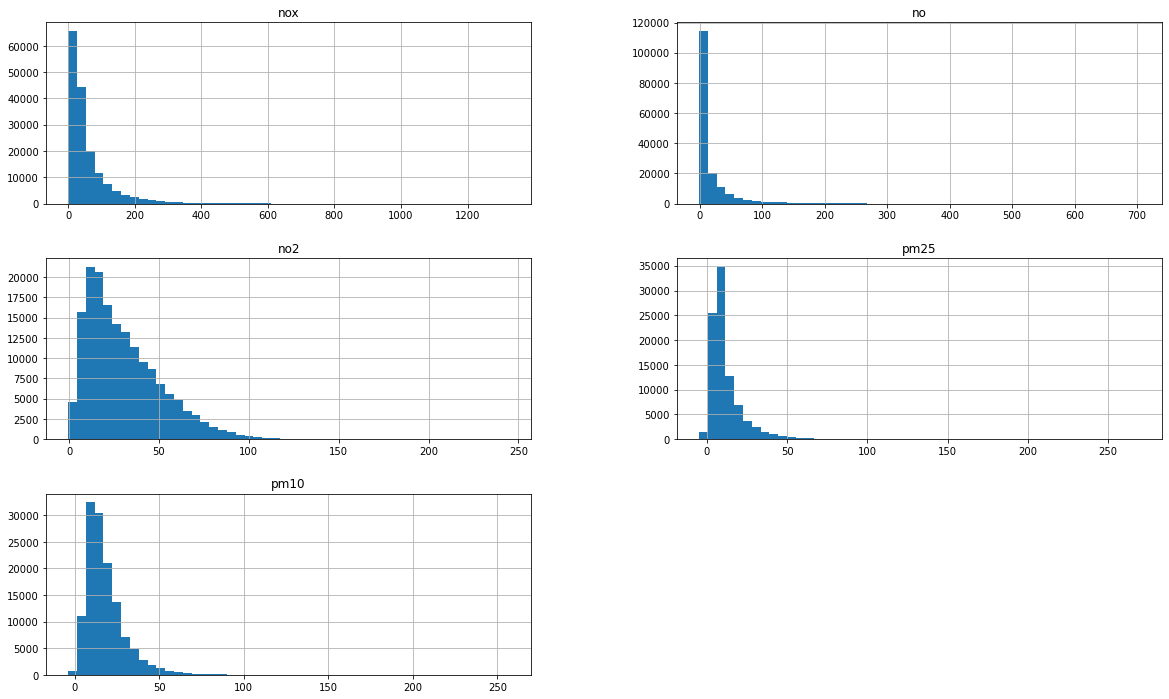

In [33]:
pol_df[['nox', 'no', 'no2', 'pm25', 'pm10']].hist(figsize=(20, 12), bins=50)

In [42]:
pol_df['datetime'].dt.year

6         2010
7         2010
14        2010
20        2010
23        2010
          ... 
804215    2021
804216    2021
804220    2021
804229    2021
804231    2021
Name: datetime, Length: 173233, dtype: int64

In [88]:
df['year'] = df['datetime'].dt.year

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(style='whitegrid')

In [115]:
plot_df = df.groupby(['year'])[['pm10', 'pm25', 'no', 'no2', 'nox']].mean().reset_index()
plot_df

,year,pm10,pm25,no,no2,nox
0,2010,19.730909,14.039928,53.667781,47.959368,128.276861
1,2011,22.223558,14.653951,46.460549,45.857533,114.032548
2,2012,19.134597,13.236969,53.771873,46.508306,126.050275
3,2013,17.700762,12.809435,51.218120,46.703656,125.223732
4,2014,16.740057,12.954764,46.782043,44.424865,116.274754
5,2015,14.909990,10.246750,47.836609,44.812737,117.330059
6,2016,15.418492,11.660835,32.603087,37.095834,87.079133
7,2017,15.683633,9.652907,27.478863,34.814835,76.952563
8,2018,19.541392,12.037916,25.761044,35.214590,74.723108
9,2019,19.682748,10.953558,35.643056,36.665056,91.334482


Text(0.5, 1.0, 'Pollutants Concentration Over The Years')

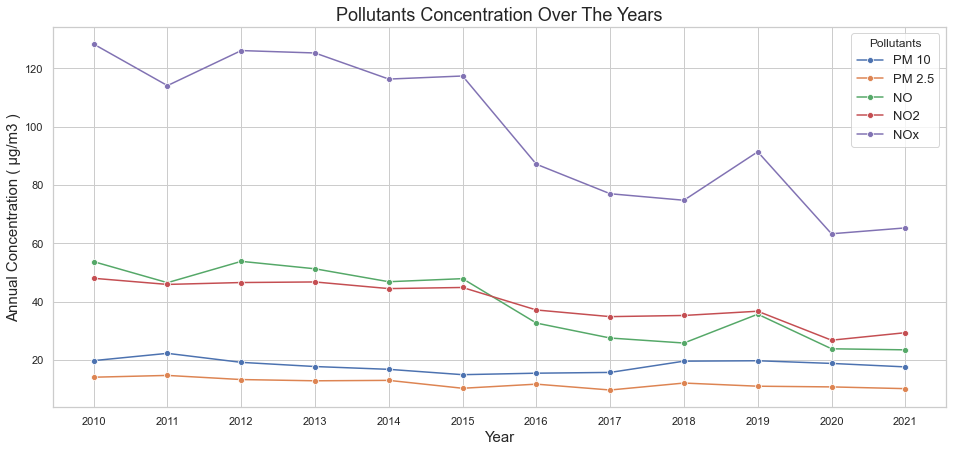

In [122]:
plt.figure(figsize=(16, 7))

sns.lineplot(x='year', y='pm10', data=plot_df, marker='o')
sns.lineplot(x='year', y='pm25', data=plot_df, marker='o')
sns.lineplot(x='year', y='no', data=plot_df, marker='o')
sns.lineplot(x='year', y='no2', data=plot_df, marker='o')
sns.lineplot(x='year', y='nox', data=plot_df, marker='o')
sns.lineplot()
plt.xticks([2010+i for i in range(12)])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Annual Concentration ( µg/m3 )", fontsize=15)
plt.legend(['PM 10', 'PM 2.5', 'NO', 'NO2', 'NOx'], title="Pollutants", fontsize=13)
# plt.legend(labels=["1","2", "3", "4", "5"], fontsize = 'large', title_fontsize = "10")
plt.title("Pollutants Concentration Over The Years", fontsize=18)

#### checking null values for each available sensor values at each site

In [175]:
df['obs_date']

0         2010-01-01
1         2010-01-01
2         2010-01-01
3         2010-01-01
4         2010-01-01
             ...    
804227    2021-12-31
804228    2021-12-31
804229    2021-12-31
804230    2021-12-31
804231    2021-12-31
Name: obs_date, Length: 804232, dtype: object

In [36]:
df[df['nox'].isna() & df['no2'].isna() & df['no'].isna()]

,datetime,nox,no2,no,site_id,pm10,nvpm10,vpm10,nvpm25,pm25,...,so2,tempt,relative_humidity,location,site_start_date,site_end_date,is_active,instrument_type,latitude,longitude
664325,2010-01-03 14:00:00+00:00,NaN,NaN,NaN,459,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Cheltenham Road \ Station Road,2008-06-25 00:00:00+00:00,2011-12-31 00:00:00+00:00,False,Continuous (Reference),51.4689385901,-2.5927241667
664334,2010-01-03 15:00:00+00:00,NaN,NaN,NaN,459,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Cheltenham Road \ Station Road,2008-06-25 00:00:00+00:00,2011-12-31 00:00:00+00:00,False,Continuous (Reference),51.4689385901,-2.5927241667
664346,2010-01-03 16:00:00+00:00,NaN,NaN,NaN,459,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Cheltenham Road \ Station Road,2008-06-25 00:00:00+00:00,2011-12-31 00:00:00+00:00,False,Continuous (Reference),51.4689385901,-2.5927241667
664356,2010-01-03 17:00:00+00:00,NaN,NaN,NaN,459,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Cheltenham Road \ Station Road,2008-06-25 00:00:00+00:00,2011-12-31 00:00:00+00:00,False,Continuous (Reference),51.4689385901,-2.5927241667
664368,2010-01-03 18:00:00+00:00,NaN,NaN,NaN,459,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Cheltenham Road \ Station Road,2008-06-25 00:00:00+00:00,2011-12-31 00:00:00+00:00,False,Continuous (Reference),51.4689385901,-2.5927241667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474833,2022-02-14 16:00:00+00:00,NaN,NaN,NaN,500,19.324,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Temple Way,2017-08-01 00:00:00+00:00,NaT,True,Continuous (Reference),51.4579497129,-2.58398909033
1474880,2022-02-14 23:00:00+00:00,NaN,NaN,NaN,500,10.628,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Temple Way,2017-08-01 00:00:00+00:00,NaT,True,Continuous (Reference),51.4579497129,-2.58398909033
1474891,2022-02-15 01:00:00+00:00,NaN,NaN,NaN,500,10.628,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Temple Way,2017-08-01 00:00:00+00:00,NaT,True,Continuous (Reference),51.4579497129,-2.58398909033
1474905,2022-02-15 03:00:00+00:00,NaN,NaN,NaN,500,16.425,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Temple Way,2017-08-01 00:00:00+00:00,NaT,True,Continuous (Reference),51.4579497129,-2.58398909033
